In [182]:
import pandas as pd
from tqdm import tqdm

In [183]:
import matplotlib.pyplot as plt

In [184]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [185]:
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

# 파일 확인

In [186]:
# d_l_match_yn :  속성 D 대분류 매칭 여부
# d_m_match_yn :  속성 D 중분류 매칭 여부
# d_s_match_yn :  속성 D 소분류 매칭 여부
# h_l_match_yn :  속성 H 대분류 매칭 여부
# h_m_match_yn :  속성 H 중분류 매칭 여부
# h_s_match_yn :  속성 H 소분류 매칭 여부

# person_attribute_a :  회원 속성 A
# person_attribute_a_1 :  회원 속성 A 하위 속성 1
# person_attribute_b :  회원 속성 B

# person_prefer_c :  회원 선호 속성 C
# person_prefer_d_1 :  회원 선호 속성 D 1번
# person_prefer_d_2 :  회원 선호 속성 D 2번
# person_prefer_d_3 :  회원 선호 속성 D 3번
# person_prefer_e :  회원 선호 속성 E
# person_prefer_f :  회원 선호 속성 F
# person_prefer_g :  회원 선호 속성 G
# person_prefer_h_1 :  회원 선호 속성 H 1번
# person_prefer_h_2 :  회원 선호 속성 H 2번
# person_prefer_h_3 :  회원 선호 속성 H 3번

# contents_attribute_i :  컨텐츠 속성 I
# contents_attribute_a :  컨텐츠 속성 A
# contents_attribute_j_1 :  컨텐츠 속성 J 하위 속성 1
# contents_attribute_j :  컨텐츠 속성 J
# contents_attribute_c :  컨텐츠 속성 C
# contents_attribute_k :  컨텐츠 속성 K
# contents_attribute_l :  컨텐츠 속성 L
# contents_attribute_d :  컨텐츠 속성 D
# contents_attribute_m :  컨텐츠 속성 M
# contents_attribute_e :  컨텐츠 속성 E
# contents_attribute_h :  컨텐츠 속성 H

# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시
# target :  컨텐츠 사용 여부 (라벨)

In [187]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 매칭 6개 특성 별 데이터 확인

In [188]:
import itertools

In [189]:
# 단계(6단계)별로 [0, 1]의 선택지 있는 모든 경우의 수 출력
match_cases = list(itertools.product(*[[0,1] for i in range(6)]))
match_cases

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1, 0),
 (0, 0, 0, 1, 1, 1),
 (0, 0, 1, 0, 0, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 1, 0, 0),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 1, 0),
 (0, 0, 1, 1, 1, 1),
 (0, 1, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 1),
 (0, 1, 0, 0, 1, 0),
 (0, 1, 0, 0, 1, 1),
 (0, 1, 0, 1, 0, 0),
 (0, 1, 0, 1, 0, 1),
 (0, 1, 0, 1, 1, 0),
 (0, 1, 0, 1, 1, 1),
 (0, 1, 1, 0, 0, 0),
 (0, 1, 1, 0, 0, 1),
 (0, 1, 1, 0, 1, 0),
 (0, 1, 1, 0, 1, 1),
 (0, 1, 1, 1, 0, 0),
 (0, 1, 1, 1, 0, 1),
 (0, 1, 1, 1, 1, 0),
 (0, 1, 1, 1, 1, 1),
 (1, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 0, 1),
 (1, 0, 0, 0, 1, 0),
 (1, 0, 0, 0, 1, 1),
 (1, 0, 0, 1, 0, 0),
 (1, 0, 0, 1, 0, 1),
 (1, 0, 0, 1, 1, 0),
 (1, 0, 0, 1, 1, 1),
 (1, 0, 1, 0, 0, 0),
 (1, 0, 1, 0, 0, 1),
 (1, 0, 1, 0, 1, 0),
 (1, 0, 1, 0, 1, 1),
 (1, 0, 1, 1, 0, 0),
 (1, 0, 1, 1, 0, 1),
 (1, 0, 1, 1, 1, 0),
 (1, 0, 1, 1,

In [190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [191]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [192]:
match_cases[0]

(0, 0, 0, 0, 0, 0)

In [193]:
a = match_cases[0]
set_a = pd.DataFrame(a)
set_a

,0
0,0
1,0
2,0
3,0
4,0
5,0


In [194]:
tmp_set = pd.DataFrame(train.iloc[0, 1:7]).reset_index(drop=True)
tmp_set = tmp_set.astype('int64')
tmp_set

,0
0,1
1,1
2,1
3,0
4,0
5,0


In [195]:
set_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6 non-null      int64
dtypes: int64(1)
memory usage: 176.0 bytes


In [196]:
tmp_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6 non-null      int64
dtypes: int64(1)
memory usage: 176.0 bytes


In [197]:
match_cases[56]

(1, 1, 1, 0, 0, 0)

In [198]:
c0, c1, c2, c3, c4, c5 = match_cases[56]

In [199]:
type(c0)

int

In [200]:
train[(train['d_l_match_yn']==1)&(train['d_m_match_yn']==1)&(train['d_s_match_yn']==1)&
    (train['h_l_match_yn']==0)&(train['h_m_match_yn']==0)&(train['h_s_match_yn']==0)]

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
4,4,True,True,True,False,False,False,1,3,4,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
19,19,True,True,True,False,False,False,2,0,2,...,2,933,159,1,4,233,55023,578347,2020-06-15 18:01:22,0
60,60,True,True,True,False,False,False,1,7,4,...,2,534,142,1,4,138,526057,306376,2020-04-20 15:34:50,0
77,77,True,True,True,False,False,False,2,0,2,...,2,677,114,2,3,109,501438,401123,2020-03-09 18:50:05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501853,501853,True,True,True,False,False,False,1,7,3,...,2,589,147,3,7,65,660974,286222,2020-03-20 14:15:35,1
501870,501870,True,True,True,False,False,False,1,6,4,...,2,99,102,1,4,114,819352,520115,2020-08-26 20:41:14,1
501880,501880,True,True,True,False,False,False,1,3,4,...,2,758,305,1,6,288,342562,172466,2020-11-09 14:31:27,1
501887,501887,True,True,True,False,False,False,1,0,4,...,2,981,102,1,4,228,906184,634904,2020-07-24 16:44:03,1


In [201]:
c0, c1, c2, c3, c4, c5 = match_cases[0]
match_cases[0]

(0, 0, 0, 0, 0, 0)

In [202]:
# (0, 0, 0, 0, 0, 0)
df0 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]

In [203]:
df0.shape

(36913, 35)

In [204]:
num = 1
c0, c1, c2, c3, c4, c5 = match_cases[num]
df1 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
df1.shape

(0, 35)

In [205]:
num = 2
c0, c1, c2, c3, c4, c5 = match_cases[num]
df2 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
df2.shape

(0, 35)

In [206]:
num = 3
c0, c1, c2, c3, c4, c5 = match_cases[num]
df3 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], df3.shape

((0, 0, 0, 0, 1, 1), (0, 35))

In [207]:
num = 4
c0, c1, c2, c3, c4, c5 = match_cases[num]
df4 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], df4.shape

((0, 0, 0, 1, 0, 0), (78861, 35))

In [208]:
num = 5
c0, c1, c2, c3, c4, c5 = match_cases[num]
df5 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], df5.shape

((0, 0, 0, 1, 0, 1), (0, 35))

In [209]:
for num in range(64):
    c0, c1, c2, c3, c4, c5 = match_cases[num]
    tmp_df = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
        (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
    print(num, match_cases[num], tmp_df.shape)

0 (0, 0, 0, 0, 0, 0) (36913, 35)
1 (0, 0, 0, 0, 0, 1) (0, 35)
2 (0, 0, 0, 0, 1, 0) (0, 35)
3 (0, 0, 0, 0, 1, 1) (0, 35)
4 (0, 0, 0, 1, 0, 0) (78861, 35)
5 (0, 0, 0, 1, 0, 1) (0, 35)
6 (0, 0, 0, 1, 1, 0) (17818, 35)
7 (0, 0, 0, 1, 1, 1) (53091, 35)
8 (0, 0, 1, 0, 0, 0) (0, 35)
9 (0, 0, 1, 0, 0, 1) (0, 35)
10 (0, 0, 1, 0, 1, 0) (0, 35)
11 (0, 0, 1, 0, 1, 1) (0, 35)
12 (0, 0, 1, 1, 0, 0) (0, 35)
13 (0, 0, 1, 1, 0, 1) (0, 35)
14 (0, 0, 1, 1, 1, 0) (0, 35)
15 (0, 0, 1, 1, 1, 1) (0, 35)
16 (0, 1, 0, 0, 0, 0) (0, 35)
17 (0, 1, 0, 0, 0, 1) (0, 35)
18 (0, 1, 0, 0, 1, 0) (0, 35)
19 (0, 1, 0, 0, 1, 1) (0, 35)
20 (0, 1, 0, 1, 0, 0) (0, 35)
21 (0, 1, 0, 1, 0, 1) (0, 35)
22 (0, 1, 0, 1, 1, 0) (0, 35)
23 (0, 1, 0, 1, 1, 1) (0, 35)
24 (0, 1, 1, 0, 0, 0) (0, 35)
25 (0, 1, 1, 0, 0, 1) (0, 35)
26 (0, 1, 1, 0, 1, 0) (0, 35)
27 (0, 1, 1, 0, 1, 1) (0, 35)
28 (0, 1, 1, 1, 0, 0) (0, 35)
29 (0, 1, 1, 1, 0, 1) (0, 35)
30 (0, 1, 1, 1, 1, 0) (0, 35)
31 (0, 1, 1, 1, 1, 1) (0, 35)
32 (1, 0, 0, 0, 0, 0) (32635, 35)


In [210]:
for num in range(64):
    c0, c1, c2, c3, c4, c5 = match_cases[num]
    tmp_df = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
        (test['h_l_match_yn']==c3)&(test['h_m_match_yn']==c4)&(test['h_s_match_yn']==c5)]
    print(num, match_cases[num], tmp_df.shape)

0 (0, 0, 0, 0, 0, 0) (3343, 34)
1 (0, 0, 0, 0, 0, 1) (0, 34)
2 (0, 0, 0, 0, 1, 0) (0, 34)
3 (0, 0, 0, 0, 1, 1) (0, 34)
4 (0, 0, 0, 1, 0, 0) (7196, 34)
5 (0, 0, 0, 1, 0, 1) (0, 34)
6 (0, 0, 0, 1, 1, 0) (1843, 34)
7 (0, 0, 0, 1, 1, 1) (5224, 34)
8 (0, 0, 1, 0, 0, 0) (0, 34)
9 (0, 0, 1, 0, 0, 1) (0, 34)
10 (0, 0, 1, 0, 1, 0) (0, 34)
11 (0, 0, 1, 0, 1, 1) (0, 34)
12 (0, 0, 1, 1, 0, 0) (0, 34)
13 (0, 0, 1, 1, 0, 1) (0, 34)
14 (0, 0, 1, 1, 1, 0) (0, 34)
15 (0, 0, 1, 1, 1, 1) (0, 34)
16 (0, 1, 0, 0, 0, 0) (0, 34)
17 (0, 1, 0, 0, 0, 1) (0, 34)
18 (0, 1, 0, 0, 1, 0) (0, 34)
19 (0, 1, 0, 0, 1, 1) (0, 34)
20 (0, 1, 0, 1, 0, 0) (0, 34)
21 (0, 1, 0, 1, 0, 1) (0, 34)
22 (0, 1, 0, 1, 1, 0) (0, 34)
23 (0, 1, 0, 1, 1, 1) (0, 34)
24 (0, 1, 1, 0, 0, 0) (0, 34)
25 (0, 1, 1, 0, 0, 1) (0, 34)
26 (0, 1, 1, 0, 1, 0) (0, 34)
27 (0, 1, 1, 0, 1, 1) (0, 34)
28 (0, 1, 1, 1, 0, 0) (0, 34)
29 (0, 1, 1, 1, 0, 1) (0, 34)
30 (0, 1, 1, 1, 1, 0) (0, 34)
31 (0, 1, 1, 1, 1, 1) (0, 34)
32 (1, 0, 0, 0, 0, 0) (2821, 34)
33 (1

# 유효한 경우의 수

## train

In [211]:
# 0 (0, 0, 0, 0, 0, 0) (36913, 35)
# 4 (0, 0, 0, 1, 0, 0) (78861, 35)
# 6 (0, 0, 0, 1, 1, 0) (17818, 35)
# 7 (0, 0, 0, 1, 1, 1) (53091, 35)
# 32 (1, 0, 0, 0, 0, 0) (32635, 35)
# 36 (1, 0, 0, 1, 0, 0) (78338, 35)
# 38 (1, 0, 0, 1, 1, 0) (17818, 35)
# 39 (1, 0, 0, 1, 1, 1) (52850, 35)
# 48 (1, 1, 0, 0, 0, 0) (12804, 35)
# 52 (1, 1, 0, 1, 0, 0) (25894, 35)
# 54 (1, 1, 0, 1, 1, 0) (5162, 35)
# 55 (1, 1, 0, 1, 1, 1) (14510, 35)
# 56 (1, 1, 1, 0, 0, 0) (20261, 35)
# 60 (1, 1, 1, 1, 0, 0) (33112, 35)
# 62 (1, 1, 1, 1, 1, 0) (5706, 35)
# 63 (1, 1, 1, 1, 1, 1) (16178, 35)

## test

In [212]:
# 0 (0, 0, 0, 0, 0, 0) (3343, 34)
# 4 (0, 0, 0, 1, 0, 0) (7196, 34)
# 6 (0, 0, 0, 1, 1, 0) (1843, 34)
# 7 (0, 0, 0, 1, 1, 1) (5224, 34)
# 32 (1, 0, 0, 0, 0, 0) (2821, 34)
# 36 (1, 0, 0, 1, 0, 0) (7051, 34)
# 38 (1, 0, 0, 1, 1, 0) (1600, 34)
# 39 (1, 0, 0, 1, 1, 1) (4826, 34)
# 48 (1, 1, 0, 0, 0, 0) (1137, 34)
# 52 (1, 1, 0, 1, 0, 0) (2474, 34)
# 54 (1, 1, 0, 1, 1, 0) (455, 34)
# 55 (1, 1, 0, 1, 1, 1) (1358, 34)
# 56 (1, 1, 1, 0, 0, 0) (1788, 34)
# 60 (1, 1, 1, 1, 0, 0) (3147, 34)
# 62 (1, 1, 1, 1, 1, 0) (575, 34)
# 63 (1, 1, 1, 1, 1, 1) (1566, 34)

# 시각화 위해 경우의 수 별로 데이터 셋 생성

In [213]:
num = 0
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df1 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df1.shape

((0, 0, 0, 0, 0, 0), (36913, 35))

In [214]:
num = 4
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df2 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df2.shape

((0, 0, 0, 1, 0, 0), (78861, 35))

In [215]:
num = 6
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df3 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df3.shape

((0, 0, 0, 1, 1, 0), (17818, 35))

In [216]:
num = 7
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df4 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df4.shape

((0, 0, 0, 1, 1, 1), (53091, 35))

In [217]:
num = 32
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df5 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df5.shape

((1, 0, 0, 0, 0, 0), (32635, 35))

In [218]:
num = 36
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df6 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df6.shape

((1, 0, 0, 1, 0, 0), (78338, 35))

In [219]:
num = 38
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df7 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df7.shape

((1, 0, 0, 1, 1, 0), (17818, 35))

In [220]:
num = 39
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df8 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df8.shape

((1, 0, 0, 1, 1, 1), (52850, 35))

In [221]:
num = 48
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df9 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df9.shape

((1, 1, 0, 0, 0, 0), (12804, 35))

In [222]:
num = 52
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df10 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df10.shape

((1, 1, 0, 1, 0, 0), (25894, 35))

In [223]:
num = 54
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df11 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df11.shape

((1, 1, 0, 1, 1, 0), (5162, 35))

In [224]:
num = 55
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df12 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df12.shape

((1, 1, 0, 1, 1, 1), (14510, 35))

In [225]:
num = 56
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df13 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df13.shape

((1, 1, 1, 0, 0, 0), (20261, 35))

In [226]:
num = 60
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df14 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df14.shape

((1, 1, 1, 1, 0, 0), (33112, 35))

In [227]:
num = 62
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df15 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df15.shape

((1, 1, 1, 1, 1, 0), (5706, 35))

In [228]:
num = 63
c0, c1, c2, c3, c4, c5 = match_cases[num]
train_df16 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
match_cases[num], train_df16.shape

((1, 1, 1, 1, 1, 1), (16178, 35))

In [229]:
tmp = train_df1['target'].value_counts(normalize=True)
tmp_df = pd.DataFrame(tmp)
tmp_df

,target
0,0.582342
1,0.417658


<BarContainer object of 2 artists>

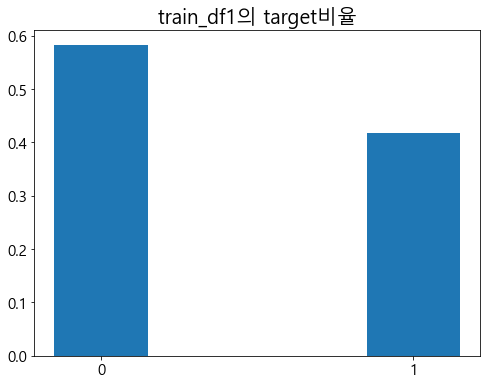

In [230]:
plt.figure(figsize=(8,6))
plt.title('train_df1의 target비율', fontdict={'size':20})
plt.xticks(tmp_df.index, fontsize=15)
plt.yticks(fontsize=15)
plt.bar(x=tmp_df.index, height=tmp_df['target'], width=0.3)

In [231]:
tmp = train_df1['target'].value_counts(normalize=True)
tmp_df = pd.DataFrame(tmp)
tmp_df

,target
0,0.582342
1,0.417658


In [232]:
tmp_df = tmp_df.rename(columns={'target':'train_df1'})
tmp_df

,train_df1
0,0.582342
1,0.417658


In [233]:
tmp = train_df2['target'].value_counts(normalize=True)
tmp_df2 = pd.DataFrame(tmp)
tmp_df2

,target
0,0.585866
1,0.414134


In [234]:
tmp_df2 = tmp_df2.rename(columns={'target':'train_df2'})
tmp_df2

,train_df2
0,0.585866
1,0.414134


In [235]:
tmp = train_df3['target'].value_counts(normalize=True)
tmp_df3 = pd.DataFrame(tmp)
tmp_df3 = tmp_df3.rename(columns={'target':'train_df3'})
tmp_df3

,train_df3
0,0.610338
1,0.389662


In [236]:
tmp = train_df4['target'].value_counts(normalize=True)
tmp_df4 = pd.DataFrame(tmp)
tmp_df4 = tmp_df4.rename(columns={'target':'train_df4'})
tmp_df4

,train_df4
0,0.605055
1,0.394945


In [237]:
tmp = train_df5['target'].value_counts(normalize=True)
tmp_df5 = pd.DataFrame(tmp)
tmp_df5 = tmp_df5.rename(columns={'target':'train_df5'})
tmp_df5

,train_df5
0,0.508779
1,0.491221


In [238]:
tmp = train_df6['target'].value_counts(normalize=True)
tmp_df6 = pd.DataFrame(tmp)
tmp_df6 = tmp_df6.rename(columns={'target':'train_df6'})
tmp_df6

,train_df6
1,0.522543
0,0.477457


In [239]:
test = pd.DataFrame()
test = pd.concat([tmp_df4, tmp_df5, tmp_df6], axis=1)
test

,train_df4,train_df5,train_df6
0,0.605055,0.508779,0.477457
1,0.394945,0.491221,0.522543


In [240]:
df_list= [train_df1, train_df2, train_df3, train_df4,
        train_df5, train_df6, train_df7, train_df8,
        train_df9, train_df10, train_df11, train_df12,
        train_df13, train_df14, train_df15, train_df16]

In [241]:
target_df = pd.DataFrame()
for df in df_list:
    tmp = df['target'].value_counts(normalize=True)
    tmp_df = pd.DataFrame(tmp)
    target_df = pd.concat([target_df, tmp_df], axis=1)

In [242]:
target_df

,target,target,target,target,target,target,target,target,target,target,target,target,target,target,target,target
0,0.582342,0.585866,0.610338,0.605055,0.508779,0.477457,0.473622,0.458846,0.457045,0.405847,0.39229,0.380979,0.459158,0.381674,0.370662,0.35505
1,0.417658,0.414134,0.389662,0.394945,0.491221,0.522543,0.526378,0.541154,0.542955,0.594153,0.60771,0.619021,0.540842,0.618326,0.629338,0.64495


In [243]:
target_df.columns = ['train_df1', 'train_df2', 'train_df3', 'train_df4',
        'train_df5', 'train_df6', 'train_df7', 'train_df8',
        'train_df9', 'train_df10', 'train_df11', 'train_df12',
        'train_df13', 'train_df14', 'train_df15', 'train_df16']
target_df

,train_df1,train_df2,train_df3,train_df4,train_df5,train_df6,train_df7,train_df8,train_df9,train_df10,train_df11,train_df12,train_df13,train_df14,train_df15,train_df16
0,0.582342,0.585866,0.610338,0.605055,0.508779,0.477457,0.473622,0.458846,0.457045,0.405847,0.39229,0.380979,0.459158,0.381674,0.370662,0.35505
1,0.417658,0.414134,0.389662,0.394945,0.491221,0.522543,0.526378,0.541154,0.542955,0.594153,0.60771,0.619021,0.540842,0.618326,0.629338,0.64495


## 매칭 경우의 수별 시각화

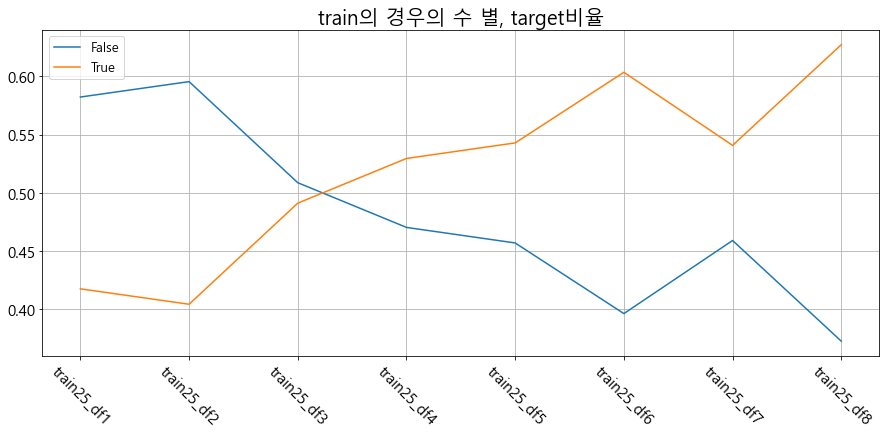

In [272]:
plt.figure(figsize=(15,6))
plt.title('train의 경우의 수 별, target비율', fontdict={'size':20})
plt.xticks(fontsize=15, rotation=-45)
plt.yticks(fontsize=15)
plt.grid(True)
plt.plot(target_df.iloc[0,:], label='False')
plt.plot(target_df.iloc[1,:], label='True')
plt.legend(fontsize=13)

# 25개 특성에서 매칭 별로 데이터셋 생성

In [247]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [248]:
test_col = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
  'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
   'person_prefer_e',
    'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 
     'contents_attribute_i', 'contents_attribute_a',
      'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
       'contents_attribute_l', 'contents_attribute_d',
        'contents_attribute_m', 'contents_attribute_e',
         'contents_attribute_h']
target = ['target']
train_col = test_col + target
len(train_col), len(test_col)

(26, 25)

In [249]:
train25 = train[train_col]
test25 = test[test_col]

In [250]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train25 = train25.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train25.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,...,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target
0,True,True,True,False,1,4,3,5,275,370,...,3,2,10,1,1608,275,1,4,139,1
1,False,False,False,True,1,3,4,1,114,181,...,3,1,5,1,1608,275,1,4,133,0
2,False,False,False,True,2,0,3,5,464,175,...,1,2,10,1,1600,94,1,4,53,0
3,False,False,False,True,2,0,2,5,703,705,...,3,1,5,1,1608,275,5,3,74,0
4,True,True,True,False,1,3,4,5,275,370,...,1,2,10,1,1608,275,1,4,74,0


In [251]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test25 = test25.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test25.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,...,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h
0,True,False,False,True,1,1,2,1,857,851,...,1,3,2,10,1,1147,839,1,5,263
1,False,False,False,True,2,0,2,2,683,1086,...,1,3,1,5,1,1611,278,1,4,263
2,True,False,False,True,2,3,2,1,514,790,...,3,3,1,3,1,1817,490,3,4,177
3,True,False,False,True,1,2,2,5,114,181,...,3,3,1,5,1,101,150,5,3,177
4,True,False,False,True,1,6,4,5,1082,1078,...,3,1,1,5,1,985,1097,1,4,177


In [252]:
# 단계(4단계)별로 [0, 1]의 선택지 있는 모든 경우의 수 출력
match_cases = list(itertools.product(*[[0,1] for i in range(4)]))
match_cases

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

## train

In [253]:
for num in range(16):
    c0, c1, c2, c3 = match_cases[num]
    tmp = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
        (train['h_l_match_yn']==c3)]
    print(num, match_cases[num], tmp.shape)

0 (0, 0, 0, 0) (36913, 35)
1 (0, 0, 0, 1) (149770, 35)
2 (0, 0, 1, 0) (0, 35)
3 (0, 0, 1, 1) (0, 35)
4 (0, 1, 0, 0) (0, 35)
5 (0, 1, 0, 1) (0, 35)
6 (0, 1, 1, 0) (0, 35)
7 (0, 1, 1, 1) (0, 35)
8 (1, 0, 0, 0) (32635, 35)
9 (1, 0, 0, 1) (149006, 35)
10 (1, 0, 1, 0) (0, 35)
11 (1, 0, 1, 1) (0, 35)
12 (1, 1, 0, 0) (12804, 35)
13 (1, 1, 0, 1) (45566, 35)
14 (1, 1, 1, 0) (20261, 35)
15 (1, 1, 1, 1) (54996, 35)


In [293]:
# 0 (0, 0, 0, 0) (36913, 26)
# 1 (0, 0, 0, 1) (149770, 26)
# 8 (1, 0, 0, 0) (32635, 26)
# 9 (1, 0, 0, 1) (149006, 26)
# 12 (1, 1, 0, 0) (12804, 26)
# 13 (1, 1, 0, 1) (45566, 26)
# 14 (1, 1, 1, 0) (20261, 26)
# 15 (1, 1, 1, 1) (54996, 26)

In [255]:
num = 0
c0, c1, c2, c3 = match_cases[num]
train25_df1 = train25[(train25['d_l_match_yn']==c0)&(train25['d_m_match_yn']==c1)&(train25['d_s_match_yn']==c2)&
    (train25['h_l_match_yn']==c3)]
match_cases[num], train25_df1.shape

((0, 0, 0, 0), (36913, 26))

In [256]:
num = 1
c0, c1, c2, c3 = match_cases[num]
train25_df2 = train25[(train25['d_l_match_yn']==c0)&(train25['d_m_match_yn']==c1)&(train25['d_s_match_yn']==c2)&
    (train25['h_l_match_yn']==c3)]
match_cases[num], train25_df2.shape

((0, 0, 0, 1), (149770, 26))

In [257]:
num = 8
c0, c1, c2, c3 = match_cases[num]
train25_df3 = train25[(train25['d_l_match_yn']==c0)&(train25['d_m_match_yn']==c1)&(train25['d_s_match_yn']==c2)&
    (train25['h_l_match_yn']==c3)]
match_cases[num], train25_df3.shape

((1, 0, 0, 0), (32635, 26))

In [258]:
num = 9
c0, c1, c2, c3 = match_cases[num]
train25_df4 = train25[(train25['d_l_match_yn']==c0)&(train25['d_m_match_yn']==c1)&(train25['d_s_match_yn']==c2)&
    (train25['h_l_match_yn']==c3)]
match_cases[num], train25_df4.shape

((1, 0, 0, 1), (149006, 26))

In [259]:
num = 12
c0, c1, c2, c3 = match_cases[num]
train25_df5 = train25[(train25['d_l_match_yn']==c0)&(train25['d_m_match_yn']==c1)&(train25['d_s_match_yn']==c2)&
    (train25['h_l_match_yn']==c3)]
match_cases[num], train25_df5.shape

((1, 1, 0, 0), (12804, 26))

In [260]:
num = 13
c0, c1, c2, c3 = match_cases[num]
train25_df6 = train25[(train25['d_l_match_yn']==c0)&(train25['d_m_match_yn']==c1)&(train25['d_s_match_yn']==c2)&
    (train25['h_l_match_yn']==c3)]
match_cases[num], train25_df6.shape

((1, 1, 0, 1), (45566, 26))

In [261]:
num = 14
c0, c1, c2, c3 = match_cases[num]
train25_df7 = train25[(train25['d_l_match_yn']==c0)&(train25['d_m_match_yn']==c1)&(train25['d_s_match_yn']==c2)&
    (train25['h_l_match_yn']==c3)]
match_cases[num], train25_df7.shape

((1, 1, 1, 0), (20261, 26))

In [262]:
num = 15
c0, c1, c2, c3 = match_cases[num]
train25_df8 = train25[(train25['d_l_match_yn']==c0)&(train25['d_m_match_yn']==c1)&(train25['d_s_match_yn']==c2)&
    (train25['h_l_match_yn']==c3)]
match_cases[num], train25_df8.shape

((1, 1, 1, 1), (54996, 26))

In [266]:
df_list= [train25_df1, train25_df2, train25_df3, train25_df4,
        train25_df5, train25_df6, train25_df7, train25_df8]

In [269]:
target_df = pd.DataFrame()
for df in df_list:
    tmp = df['target'].value_counts(normalize=True)
    tmp_df = pd.DataFrame(tmp)
    target_df = pd.concat([target_df, tmp_df], axis=1)

target_df.columns = ['train25_df1', 'train25_df2', 'train25_df3', 'train25_df4',
        'train25_df5', 'train25_df6', 'train25_df7', 'train25_df8']
target_df

,train25_df1,train25_df2,train25_df3,train25_df4,train25_df5,train25_df6,train25_df7,train25_df8
0,0.582342,0.59558,0.508779,0.470397,0.457045,0.396392,0.459158,0.3727
1,0.417658,0.40442,0.491221,0.529603,0.542955,0.603608,0.540842,0.6273


In [ ]:
train_df = pd.DataFrame()
num_list = [0, 1, 8, 9, 12, 13, 14, 15]

for num in tqdm(num_list):
  c0, c1, c2, c3 = match_cases[num]
  tmp = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
  (train['h_l_match_yn']==c3)]
  tmp_target = tmp['target'].value_counts(normalize=True)
  tmp_df = pd.DataFrame(tmp_target)
  train_df = pd.concat([train_df, tmp_df], axis=1)

train_df.columns = ['train25_df1', 'train25_df2', 'train25_df3', 'train25_df4',
        'train25_df5', 'train25_df6', 'train25_df7', 'train25_df8']
train_df

100%|██████████| 8/8 [00:00<00:00, 14.97it/s]


,train25_df1,train25_df2,train25_df3,train25_df4,train25_df5,train25_df6,train25_df7,train25_df8
0,0.582342,0.59558,0.508779,0.470397,0.457045,0.396392,0.459158,0.3727
1,0.417658,0.40442,0.491221,0.529603,0.542955,0.603608,0.540842,0.6273


## 매칭 경우의 수별 시각화

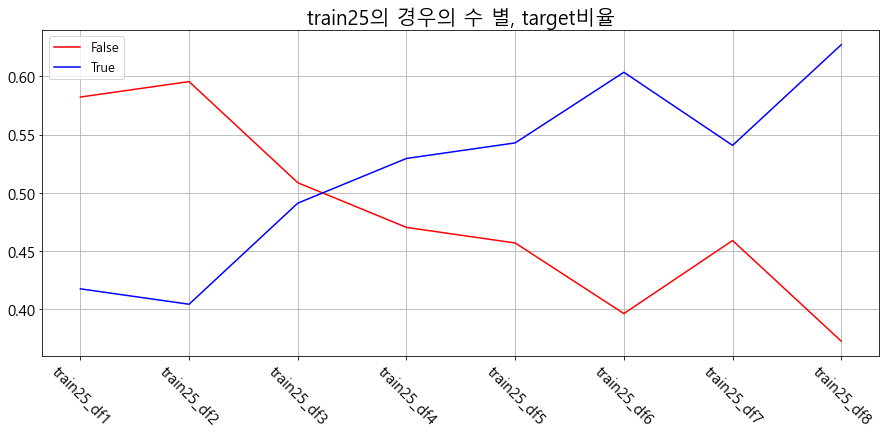

In [299]:
plt.figure(figsize=(15,6))
plt.title('train25의 경우의 수 별, target비율', fontdict={'size':20})
plt.xticks(fontsize=15, rotation=-45)
plt.yticks(fontsize=15)
plt.grid(True)
plt.plot(train_df.iloc[0,:], label='False', color='red')
plt.plot(train_df.iloc[1,:], label='True', color='blue')
plt.legend(fontsize=13)

## test

In [274]:
for num in range(16):
    c0, c1, c2, c3 = match_cases[num]
    tmp = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
        (test['h_l_match_yn']==c3)]
    print(num, match_cases[num], tmp.shape)

0 (0, 0, 0, 0) (3343, 34)
1 (0, 0, 0, 1) (14263, 34)
2 (0, 0, 1, 0) (0, 34)
3 (0, 0, 1, 1) (0, 34)
4 (0, 1, 0, 0) (0, 34)
5 (0, 1, 0, 1) (0, 34)
6 (0, 1, 1, 0) (0, 34)
7 (0, 1, 1, 1) (0, 34)
8 (1, 0, 0, 0) (2821, 34)
9 (1, 0, 0, 1) (13477, 34)
10 (1, 0, 1, 0) (0, 34)
11 (1, 0, 1, 1) (0, 34)
12 (1, 1, 0, 0) (1137, 34)
13 (1, 1, 0, 1) (4287, 34)
14 (1, 1, 1, 0) (1788, 34)
15 (1, 1, 1, 1) (5288, 34)


In [ ]:
# 0 (0, 0, 0, 0) (3343, 25)
# 1 (0, 0, 0, 1) (14263, 25)
# 8 (1, 0, 0, 0) (2821, 25)
# 9 (1, 0, 0, 1) (13477, 25)
# 12 (1, 1, 0, 0) (1137, 25)
# 13 (1, 1, 0, 1) (4287, 25)
# 14 (1, 1, 1, 0) (1788, 25)
# 15 (1, 1, 1, 1) (5288, 25)

In [284]:
num = 0
c0, c1, c2, c3 = match_cases[num]
test25_df1 = test25[(test25['d_l_match_yn']==c0)&(test25['d_m_match_yn']==c1)&(test25['d_s_match_yn']==c2)&
    (test25['h_l_match_yn']==c3)]
match_cases[num], test25_df1.shape

((0, 0, 0, 0), (3343, 25))

In [285]:
num = 1
c0, c1, c2, c3 = match_cases[num]
test25_df2 = test25[(test25['d_l_match_yn']==c0)&(test25['d_m_match_yn']==c1)&(test25['d_s_match_yn']==c2)&
    (test25['h_l_match_yn']==c3)]
match_cases[num], test25_df2.shape

((0, 0, 0, 1), (14263, 25))

In [286]:
num = 8
c0, c1, c2, c3 = match_cases[num]
test25_df3 = test25[(test25['d_l_match_yn']==c0)&(test25['d_m_match_yn']==c1)&(test25['d_s_match_yn']==c2)&
    (test25['h_l_match_yn']==c3)]
match_cases[num], test25_df3.shape

((1, 0, 0, 0), (2821, 25))

In [287]:
num = 9
c0, c1, c2, c3 = match_cases[num]
test25_df4 = test25[(test25['d_l_match_yn']==c0)&(test25['d_m_match_yn']==c1)&(test25['d_s_match_yn']==c2)&
    (test25['h_l_match_yn']==c3)]
match_cases[num], test25_df4.shape

((1, 0, 0, 1), (13477, 25))

In [288]:
num = 12
c0, c1, c2, c3 = match_cases[num]
test25_df5 = test25[(test25['d_l_match_yn']==c0)&(test25['d_m_match_yn']==c1)&(test25['d_s_match_yn']==c2)&
    (test25['h_l_match_yn']==c3)]
match_cases[num], test25_df5.shape

((1, 1, 0, 0), (1137, 25))

In [289]:
num = 13
c0, c1, c2, c3 = match_cases[num]
test25_df6 = test25[(test25['d_l_match_yn']==c0)&(test25['d_m_match_yn']==c1)&(test25['d_s_match_yn']==c2)&
    (test25['h_l_match_yn']==c3)]
match_cases[num], test25_df6.shape

((1, 1, 0, 1), (4287, 25))

In [290]:
num = 14
c0, c1, c2, c3 = match_cases[num]
test25_df7 = test25[(test25['d_l_match_yn']==c0)&(test25['d_m_match_yn']==c1)&(test25['d_s_match_yn']==c2)&
    (test25['h_l_match_yn']==c3)]
match_cases[num], test25_df7.shape

((1, 1, 1, 0), (1788, 25))

In [291]:
num = 15
c0, c1, c2, c3 = match_cases[num]
test25_df8 = test25[(test25['d_l_match_yn']==c0)&(test25['d_m_match_yn']==c1)&(test25['d_s_match_yn']==c2)&
    (test25['h_l_match_yn']==c3)]
match_cases[num], test25_df8.shape

((1, 1, 1, 1), (5288, 25))

In [292]:
test_df_list= [test25_df1, test25_df2, test25_df3, test25_df4,
        test25_df5, test25_df6, test25_df7, test25_df8]

# 마지막 부분